# Machine Learning, Assignment - 1 
## <div class="alert alert-info"><b>Predicting Leukemia Remission Occurance Using Logistic Regression</b></div>

<div class="alert alert-info"> Consider data published on n = 27 leukemia patients. The data (leukemia_remission.csv) has a response variable of whether leukemia remission occurred (REMISS), which is given by a 1.
The predictor variables are cellularity of the marrow clot section (CELL), smear differential percentage of blasts (SMEAR), percentage of absolute marrow leukemia cell infiltrate (INFIL), percentage labeling index of the bone marrow leukemia cells (LI), absolute number of blasts in the peripheral blood (BLAST), and the highest temperature prior to start of treatment (TEMP). </div>

<div class="alert alert-info">1. Import the dataset from https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/leukemia_remission/index.txt . (0.5 points)(Hint: Convert txt to csv for ease of use.) </div>

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('C:\Seetha\data\leukemia_remission.csv')
data.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


<div class="alert alert-info">2. Extract X as all columns except the first column and Y as first column. (0.5 points) </div>

In [2]:
X = data.iloc[:, 1:7].values # columns names can be given.
Y = data.iloc[:, 0].values # column name can be given.
print(X.shape)
print(Y.shape)

(27, 6)
(27,)


<div class="alert alert-info"> 2A. Scale the features. (optional) This increases the accuracy. </div>

In [3]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

# apply scaler to X using fit_transform()
Xscaled = scaler.fit_transform(X)

# display the values
print('Shape of X after StandardScaler is ', Xscaled.shape)
print('First 5 rows of X after StandardScaler')
print(Xscaled[:5,:])

Shape of X after StandardScaler is  (27, 6)
First 5 rows of X after StandardScaler
[[0.75       0.78461538 0.69047619 1.         0.53398058 0.33333333]
 [0.875      0.06153846 0.28571429 0.66666667 0.3592233  0.16666667]
 [0.75       0.86153846 0.73809524 0.26666667 0.08737864 0.        ]
 [1.         0.84615385 0.94047619 0.2        0.50970874 0.16666667]
 [0.875      0.66153846 0.71428571 0.6        0.25242718 0.        ]]


<div class="alert alert-info">3. Visualize the dataset. (2 points) </div>

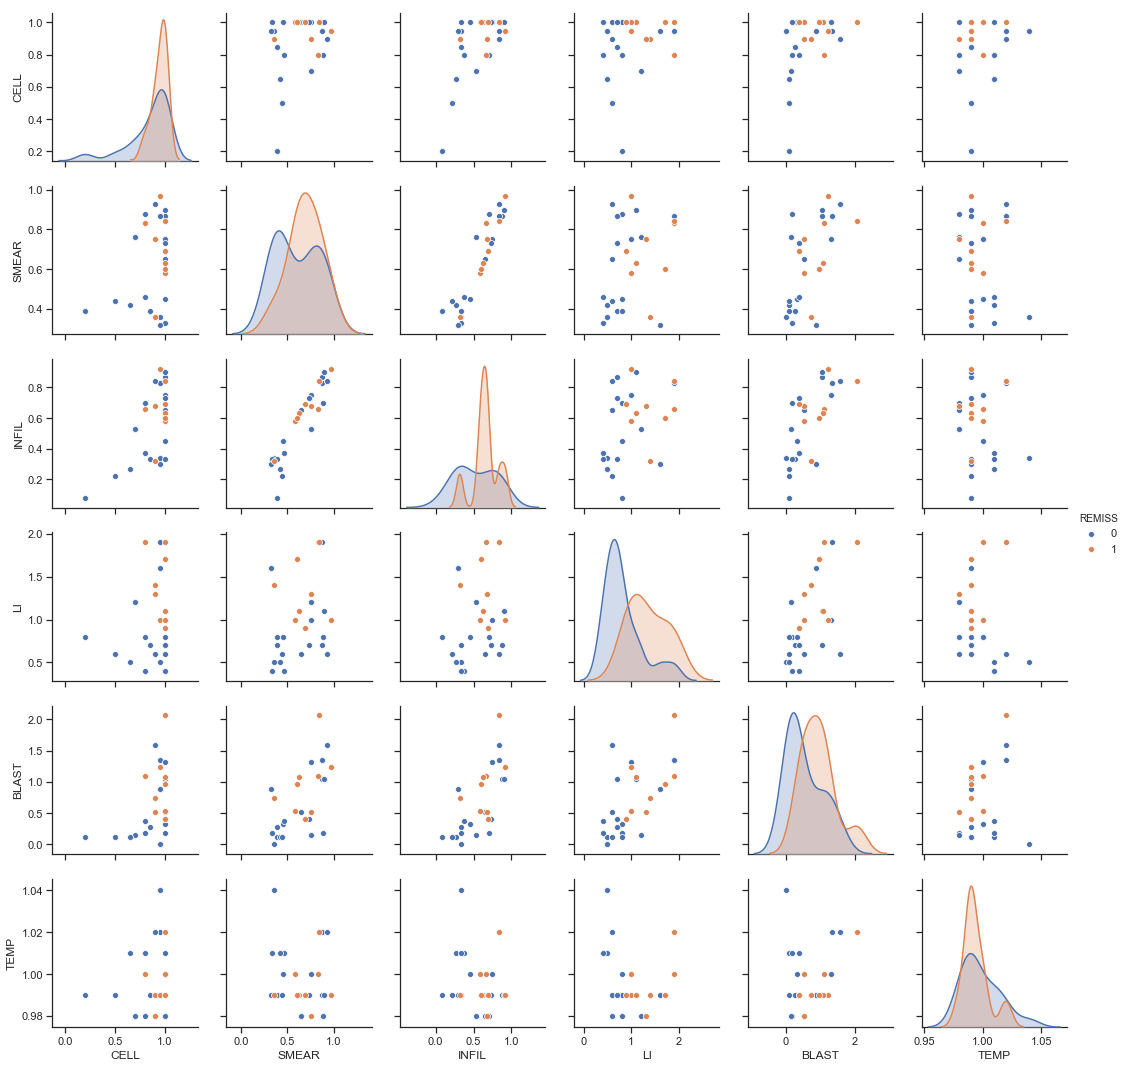

In [6]:
# pair plot to be plotted (minimum requirement)

# Basic correlogram
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(data, vars=["CELL", "SMEAR", "INFIL", "LI", "BLAST", "TEMP"], hue='REMISS')


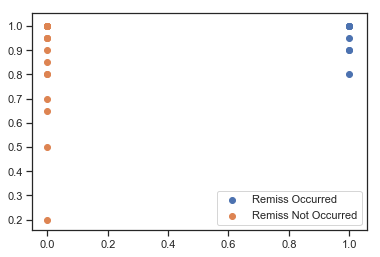

In [7]:
# plot of y alone
import matplotlib.pyplot as plt
%matplotlib inline

occ = data.loc[Y == 1]
noc = data.loc[Y == 0]
plt.scatter(occ.iloc[:, 0], occ.iloc[:, 1], label='Remiss Occurred')
plt.scatter(noc.iloc[:, 0], noc.iloc[:, 1], label='Remiss Not Occurred')
plt.legend()
plt.show()

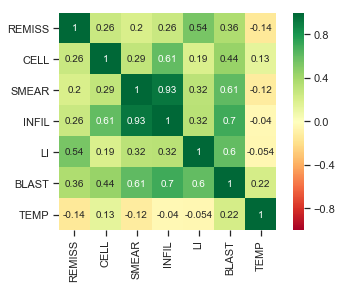

In [8]:
# correlation matrix (optional)

ax = sns.heatmap( data.corr(),  vmin=-1, vmax=1, center=0,
    cmap='RdYlGn', annot=True, square=True )

# ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')


<div class="alert alert-info">4. Split the data into training set and testing set. (1 points) Perform 10-fold cross validation. (optional) </div>

In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(Xscaled, Y, test_size=1/3, stratify=Y)

<div class="alert alert-info">5. Train a Logistic regression model for the dataset. (2 points) </div>

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear') # default classfier

logistic_model.fit(X_train,Y_train)

y_prob  = logistic_model.predict(X_test)

<div class="alert alert-info">6. Display the coefficients and form the logistic regression equation. (1 point) </div>

<div class="alert alert-info"> 6A. Print the coefficients </div>

In [11]:
print('Intercept: ', logistic_model.intercept_)

print('Coeffients: ', logistic_model.coef_)


Inercept:  [-0.91797613]
Coeffients:  [[-0.22430509  0.44816098  0.36406021  0.73869724  0.35145304 -0.67334593]]


<div class="alert alert-info"> 6B. Logistic regression equation </div>

In [12]:
#Display the coefficients and form the logistic regression equation
feature_names = data.columns.tolist()[1:]

coef_dict = {}
equation = 'z = '
equation = equation + str(logistic_model.intercept_) + ' ' 
for coef, feat in zip(logistic_model.coef_[0], feature_names):
    coef_dict[feat] = coef
    equation = equation + ' + ('+ str(coef.round(2)) +'*'+ str(feat) +')'
    
print('y = 1 / (1+e^(-z))')
print('where ')
print( equation)

y = 1 / (1+e^(-z))
where 
z = [-0.91797613]  + (-0.22*CELL) + (0.45*SMEAR) + (0.36*INFIL) + (0.74*LI) + (0.35*BLAST) + (-0.67*TEMP)


<div class="alert alert-info">7. Compute the accuracy and confusion matrix. (2 points) </div>

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix 

acc = accuracy_score(Y_test, y_prob)
print('Accuracy: ', acc * 100)

conf_matrix = confusion_matrix(Y_test, y_prob) 
print('Confusion Matrix :', )
print(conf_matrix)


Accuracy:  55.55555555555556
Confusion Matrix :
[[5 1]
 [3 0]]


<div class="alert alert-info">8. Plot the decision boundary. (1 point) </div>

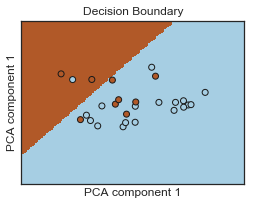

In [17]:
# Plotting the decision boundary for the model using PCA
# option 2

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(Xscaled)
pca_2d = pca.transform(Xscaled)

x_min, x_max = pca_2d.min() - .5, pca_2d.max() + .5
y_min, y_max = pca_2d.min() - .5, pca_2d.max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

logreg = LogisticRegression(solver='liblinear')
logreg.fit(pca_2d, Y)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Decision Boundary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# option 2

#Plot the Decision Boundary
'''
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)
print(fit.scores_)  #Selected Features 'LI', 'BLAST'
lm1 = LogisticRegressionCV(cv=10, class_weight='balanced')
model1 = lm1.fit(X[['LI', 'BLAST']], Y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=df.LI[df.REMISS==0], y=df.BLAST[df.REMISS==0],s=10, c='b' )
ax.scatter(x=df.LI[df.REMISS==1], y=df.BLAST[df.REMISS==1],s=10, c='r' )

x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * (model1.coef_[0][0]/model1.coef_[0][1]) + (model1.intercept_/model1.coef_[0][1]))
ax.plot(x_vals, y_vals)
'''

<div class="alert alert-info">9. Identify which of the following variables are positively associated with the target column. (1 point) </div>

In [18]:
print('Positively associated features : ')
for key, val in coef_dict.items():
    if val > 0:
        print(key)

Positively associated features : 
SMEAR
INFIL
LI
BLAST


<div class="alert alert-info">10. Suppose we have cellularity is 0.3, smear is 0.28, absolute number of blasts in the peripheral blood is 0.21, percentage labeling index of the bone marrow leukemia cells is 0.9, percentage of absolute marrow leukemia cell infiltrate is 0.09, and the highest temperature prior to start of treatment 1.01. What is the model's computed probability that leukemia remission has occurred? How confident are you in the model's accuracy of this probability calculation? (2 points) </div>

In [22]:
newx = np.array([0.3, 0.28, 0.09, 0.9, 0.21, 1.01])
newx = (newx).reshape(1, -1)
print('x = ', newx)
print('y = ', logistic_model.predict(newx))

print("Predicted REMISS ","Not Occurred" if logistic_model.predict(newx)==0 else "Occurred" )

#Probability estimates.
# print(logistic_model.predict_proba(newx))

# Predict confidence scores for samples.
print( 'Confidence score = ' , logistic_model.decision_function(newx) )

x =  [[0.3  0.28 0.09 0.9  0.21 1.01]]
y =  [0]
Predicted REMISS  Not Occurred
Confidence score =  [-0.76846389]
